In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from pylab import plt, mpl
from sklearn.linear_model import Ridge, Lasso
from sklearn.utils import resample
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import math
import seaborn as sns
from sklearn.model_selection import validation_curve
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from xgboost import plot_tree
from sklearn.metrics import classification_report
from numpy import loadtxt
warnings.filterwarnings("ignore")
seed = 7
np.random.seed(seed)

In [83]:
# Read the data with Pandas
DataFrame = pd.read_csv("HTRU.csv")

<AxesSubplot:>

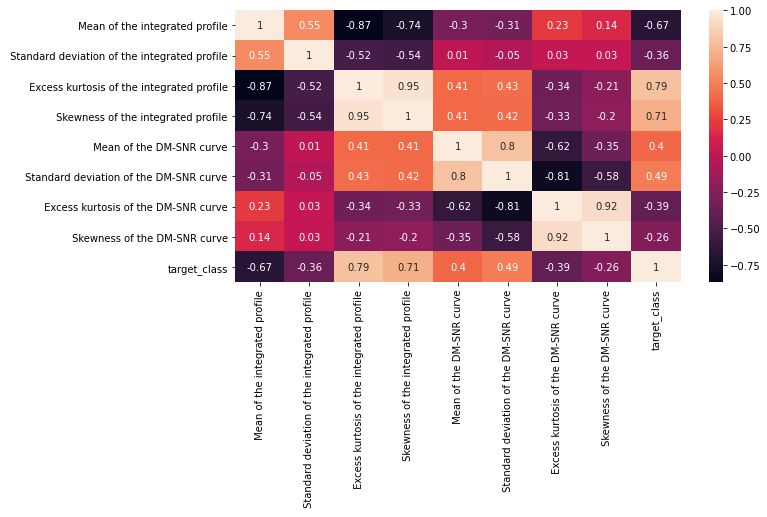

In [84]:
#Plots the correlation matrix using Pandas
correlation_matrix = DataFrame.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [142]:
#Droping the target class and the correlated features
data = DataFrame.drop(columns=['target_class',' Excess kurtosis of the integrated profile', 
                                     ' Skewness of the DM-SNR curve']).to_numpy()
target=DataFrame['target_class'].to_numpy()
#Checks if any data point is null
DataFrame.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [143]:
#Rescale the data using standard scaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)
#Splits the data into test and train sets
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=42)

In [145]:
#Finds the best model with GridSearchCV
parameters ={'max_depth':[1,3,5,7,9,11,13], 'eta':[1e-4,1e-3,1e-2,1e-1,0.7],'random_state':[42],"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
XGB=XGBClassifier()
clf = GridSearchCV(XGB, parameters,scoring='f1',verbose=4,n_jobs=-1)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:  1.8min finished


[20:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { random_satate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

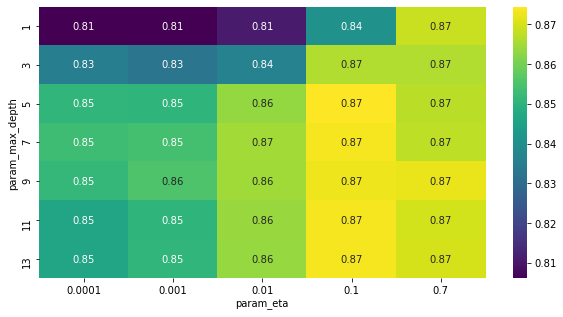

In [146]:
#Plots the heatmap between the parameters with F1 score
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_eta')
      
ax = sns.heatmap(pvt, annot=True, cmap="viridis")

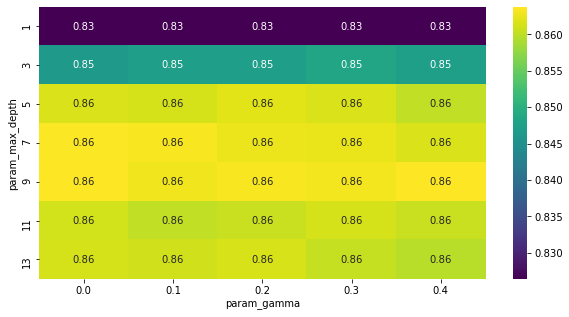

In [147]:
#Plots the heatmap between the parameters with F1 score
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_gamma')
      
ax = sns.heatmap(pvt, annot=True, cmap="viridis")

In [148]:
#print the best parameters and best score
print(clf.best_params_)
print(clf.best_score_)

{'eta': 0.1, 'gamma': 0.2, 'max_depth': 5, 'random_satate': 42}
0.87640659292947


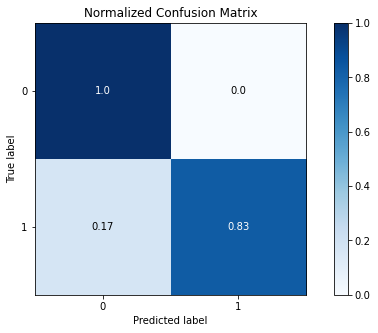

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [149]:
#Evaluate the best model using the test data set
y_pred = clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True)
plt.show()
print(classification_report(y_test, y_pred))

In [150]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split

In [151]:
#Define the neural network
def NN_model(n_layers,n_neuron,eta,lamda,optimizer,activation):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation=activation,kernel_regularizer=regularizers.l2(lamda),input_dim=data.shape[1]))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation=activation,kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

In [152]:
epochs = 100
batch_size = 100
#allows for scikit-learn to use the neural network for GridSearchCV
DNN =  KerasClassifier(build_fn=NN_model, epochs=100, batch_size=100,verbose=0)

In [165]:
#Finds the best model with GridSearchCV
#to find lamda and eta parameters with hiest scores
param_grid={'n_layers':[3], 'n_neuron':[50],'eta':[1e-5,1e-4,1e-3,1e-2,1e-1,1],'lamda':[1e-5,1e-4,1e-3,1e-2,1e-1,1] ,'optimizer': ['adam'],'activation':['tanh']}
grid_eta_lamda = GridSearchCV(estimator=DNN, param_grid=param_grid, cv=5,scoring='f1',n_jobs=-1,verbose=5)
grid_eta_lamda.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.7min finished


GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001DEF70AA760>,
             n_jobs=-1,
             param_grid={'activation': ['tanh'],
                         'eta': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'lamda': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_layers': [3], 'n_neuron': [50],
                         'optimizer': ['adam']},
             scoring='f1', verbose=5)

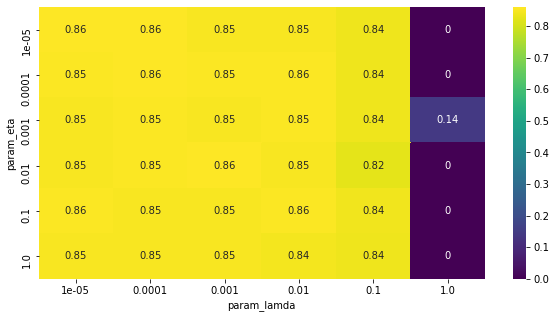

In [172]:
#Plots the heatmap between the parameters with F1 score
pvt = pd.pivot_table(pd.DataFrame(grid_eta_lamda.cv_results_),
    values='mean_test_score', index='param_eta', columns='param_lamda')  
ax = sns.heatmap(pvt, annot=True, cmap="viridis")

In [154]:
#Finds the best model with GridSearchCV
param_grid={'n_layers':[1,2,3,4,5,6], 'n_neuron':[10,50,100],'eta':[0.001,0.01,0.1],'lamda':[1e-4,1e-3] ,'optimizer': ['adam'],'activation':['relu']}
grid = GridSearchCV(estimator=DNN, param_grid=param_grid, cv=5,scoring='f1',n_jobs=-1,verbose=5)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 18.0min finished


GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001DEF70AA760>,
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'eta': [0.001, 0.01, 0.1],
                         'lamda': [0.0001, 0.001],
                         'n_layers': [1, 2, 3, 4, 5, 6],
                         'n_neuron': [10, 50, 100], 'optimizer': ['adam']},
             scoring='f1', verbose=5)

In [183]:
#Imports the parameters and F1 scores into pandas
df = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["F1"])],axis=1)
display(df)

,activation,eta,lamda,n_layers,n_neuron,optimizer,F1
0,relu,0.001,0.0001,1,10,adam,0.846595
1,relu,0.001,0.0001,1,50,adam,0.851158
2,relu,0.001,0.0001,1,100,adam,0.856947
3,relu,0.001,0.0001,2,10,adam,0.857023
4,relu,0.001,0.0001,2,50,adam,0.855265
...,...,...,...,...,...,...,...
103,relu,0.100,0.0010,5,50,adam,0.853564
104,relu,0.100,0.0010,5,100,adam,0.858156
105,relu,0.100,0.0010,6,10,adam,0.857398
106,relu,0.100,0.0010,6,50,adam,0.849330


In [173]:
#print the best parameters and best score
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'relu', 'eta': 0.1, 'lamda': 0.0001, 'n_layers': 3, 'n_neuron': 50, 'optimizer': 'adam'}
0.8620014839717944


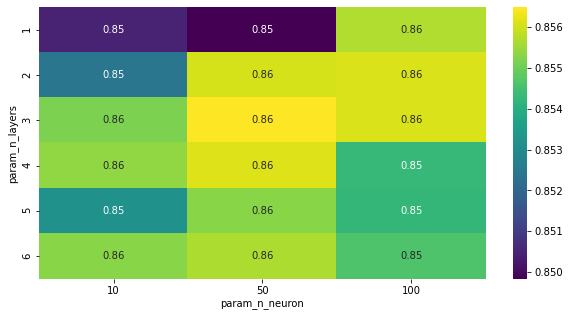

In [176]:
#Plots the heatmap between the parameters with F1 score
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_n_layers', columns='param_n_neuron')
      
ax = sns.heatmap(pvt, annot=True, cmap="viridis")

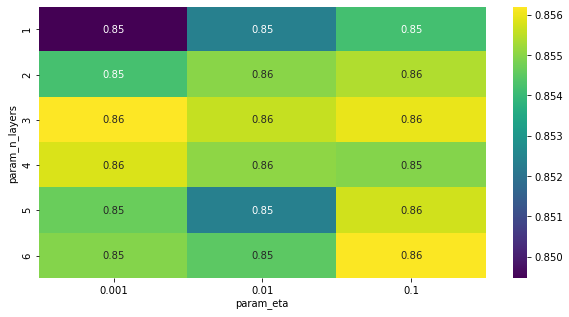

In [178]:
#Plots the heatmap between the parameters with F1 score
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_n_layers', columns='param_eta')
      
ax = sns.heatmap(pvt, annot=True, cmap="viridis")

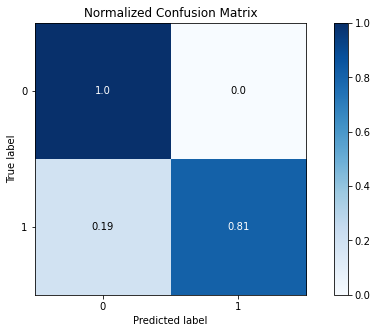

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.81      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [184]:
#Evaluate the best model using the test data set
y_pred = grid.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True)
plt.show()
y_probas = grid.predict_proba(X_test_scaled)
print(classification_report(y_test, y_pred))